In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# crude oil, or any ticker
security = "CL=F"
start_date = '2014-01-01'
end_date = '2024-01-01'

df = yf.download(tickers=security, start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,73.910004,74.980003,73.389999,73.559998,73.559998,222600
2023-12-26,73.559998,76.180000,73.129997,75.570000,75.570000,208715
2023-12-27,75.320000,75.660004,73.769997,74.110001,74.110001,253323
2023-12-28,73.800003,74.400002,71.720001,71.769997,71.769997,262748
2023-12-29,71.989998,72.620003,71.250000,71.650002,71.650002,214486


In [3]:
# calculate periodic daily return
returns = np.log(1+df['Adj Close'].pct_change())

/Users/joshzheng/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
returns.dropna()

Date
2014-01-03   -0.015629
2014-01-06   -0.005657
2014-01-07    0.002565
2014-01-08   -0.014409
2014-01-09   -0.007283
                ...   
2023-12-22   -0.004476
2023-12-26    0.026958
2023-12-27   -0.019509
2023-12-28   -0.032084
2023-12-29   -0.001673
Name: Adj Close, Length: 2512, dtype: float64

In [12]:
mu, sigma = returns.mean(), returns.std()
print(mu)
print(sigma)

0.0001253866048778745
0.029043304280533526


In [7]:
# simulated returns on next year of trading
sim_rets = np.random.normal(mu, sigma, 252)

In [8]:
initial = df['Adj Close'].iloc[-1]

In [13]:
sim_prices = initial * (sim_rets + 1).cumprod()

[72.31328417 72.61091246 71.20917677 73.07258863 71.73972626 72.82366489
 74.0710123  68.70713989 69.76138453 66.99400618 68.32892337 68.63279291
 68.70759532 71.33050693 71.57105024 70.00634305 70.5152633  67.7009115
 70.21511051 67.15400514 67.52887878 68.03201729 71.02750922 73.22266408
 72.49100819 70.43595272 70.31195117 69.84616809 70.03873095 69.774538
 68.25334288 71.82411034 73.93577649 72.52263627 72.8227634  72.23351064
 71.60696399 72.71090765 72.55747905 73.59847973 75.55785543 76.15714149
 75.21519938 74.82862046 73.35947155 72.78940971 75.47858862 74.66492504
 73.30406913 75.28711399 77.12570183 75.53924903 72.54879411 67.44799242
 68.17258714 65.65882174 65.53598732 63.12460072 62.10835659 63.99544268
 64.57532828 64.2659742  60.7946091  58.8705573  58.4555047  59.74735378
 60.16210603 64.48428146 63.78642097 65.0917912  65.66978968 67.14776535
 64.81416346 66.02178826 67.01390561 68.00443195 66.00472736 65.92259771
 64.21605752 62.00003027 65.44739938 64.36783005 67.10

In [10]:
# acquire Rm market rate (S&P 500)
market = "^GSPC"
sp500_data = yf.download(market, start=start_date, end=end_date)
sp500_data['Daily_Return'] = sp500_data['Adj Close'].pct_change()
annual_returns = sp500_data.groupby(sp500_data.index.year)['Daily_Return'].sum()

# Print annual returns
rm = annual_returns.mean()
print(f"Annual Returns: {rm}")


[*********************100%%**********************]  1 of 1 completed

Annual Returns: 0.11147521896745069


Number of Simulations that Underperformed: 54

Number of Simulations that beat the Market: 35


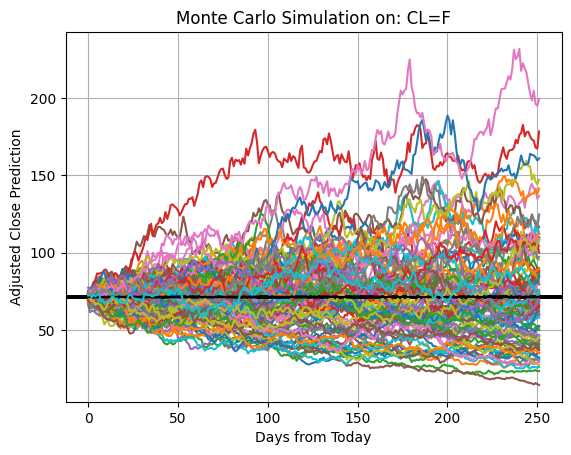

In [11]:
count = 0
mkt_count = 0
simulations = 100

for i in range(simulations):
    # annual monte carlo simulation (252 trading days)
    sim_rets = np.random.normal(mu, sigma, 252) 
    sim_prices = initial * (sim_rets + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.title("Monte Carlo Simulation on: "+security)
    plt.ylabel('Adjusted Close Prediction')
    plt.xlabel('Days from Today') 
    plt.grid(True)
    plt.plot(sim_prices)

    # check if end value >= to initial value
    if sim_prices[-1] >= initial:
        count += 1

    if sim_prices[-1] >= initial * (1+rm): 
        mkt_count += 1

print(f"Number of Simulations that Underperformed: {simulations-count}\n")

print(f"Number of Simulations that beat the Market: {mkt_count}")
